# Challenge - Telecom X - parte 2

# 🛠️ 1 - Preparação dos Dados

## 1.1 - Extração do Arquivo Tratado

In [1]:
import pandas as pd

In [82]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso19_challenge_telecomX_analise_evasao_clientes_parte2\\dados_tratados.csv')

In [3]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0.0,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1.0,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## 1.2 - Remoção de Colunas Irrelevantes

A base de dados importada já estava sem a coluna customerID

## 1.3 - Encoding

### 1.3.1 - Identificar as colunas categóricas

In [4]:
colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

### 1.3.2 - Aplicar get_dummies()

In [5]:
# Codifica variáveis categóricas (drop_first=True para evitar multicolinearidade)
dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

### 1.3.3 - Verificação da Proporção de Evasão

Proporção de clientes:
Ativos (Churn = 0): 73.5%
Evadidos (Churn = 1): 26.5%


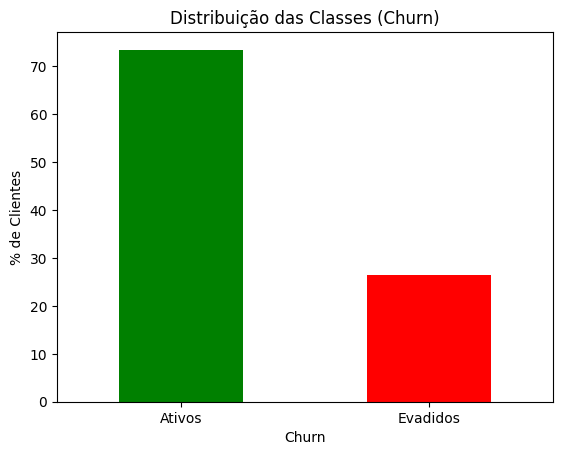

In [7]:
# Verificar a proporção de clientes que evadiram (Churn = 1) vs. ativos (Churn = 0)
y = dados['Churn']
proporcao_churn = y.value_counts(normalize=True).round(3) * 100

print("Proporção de clientes:")
print(f"Ativos (Churn = 0): {proporcao_churn[0]}%")
print(f"Evadidos (Churn = 1): {proporcao_churn[1]}%")

# Visualização com gráfico
import matplotlib.pyplot as plt

proporcao_churn.plot(kind='bar', color=['green', 'red'])
plt.xticks(ticks=[0, 1], labels=['Ativos', 'Evadidos'], rotation=0)
plt.title('Distribuição das Classes (Churn)')
plt.ylabel('% de Clientes')
plt.show()


### 1.3.4 - Balanceamento de Classes (opcional)

Seria necessário se a proporção de churn for muito baixa, algo como Ativos (Churn = 0): 90% / Evadidos (Churn = 1): 10%, mas como obtivemos valores mais altos, não será necessário.

### 1.3.5 - Normalização ou Padronização (se necessário)

Vamos pular essa etapa porque vamos usar Random Forest agora.

# 🎯 2 - Correlação e Seleção de Variáveis

## 2.1 - Análise de Correlação - Matriz de Correlação entre variáveis numéricas

In [25]:
corr = dados_encoded.corr().round(4)

In [35]:
corr['Churn'].sort_values(ascending=False)

Churn                                    1.0000
InternetService_Fiber optic              0.3080
PaymentMethod_Electronic check           0.3019
Charges.Daily                            0.1934
Charges.Monthly                          0.1934
PaperlessBilling_Yes                     0.1918
SeniorCitizen                            0.1509
StreamingTV_Yes                          0.0632
StreamingMovies_Yes                      0.0614
MultipleLines_Yes                        0.0401
PhoneService_Yes                         0.0119
gender_Male                             -0.0086
MultipleLines_No phone service          -0.0119
DeviceProtection_Yes                    -0.0662
OnlineBackup_Yes                        -0.0823
PaymentMethod_Mailed check              -0.0917
PaymentMethod_Credit card (automatic)   -0.1343
Partner_Yes                             -0.1504
Dependents_Yes                          -0.1642
TechSupport_Yes                         -0.1647
OnlineSecurity_Yes                      

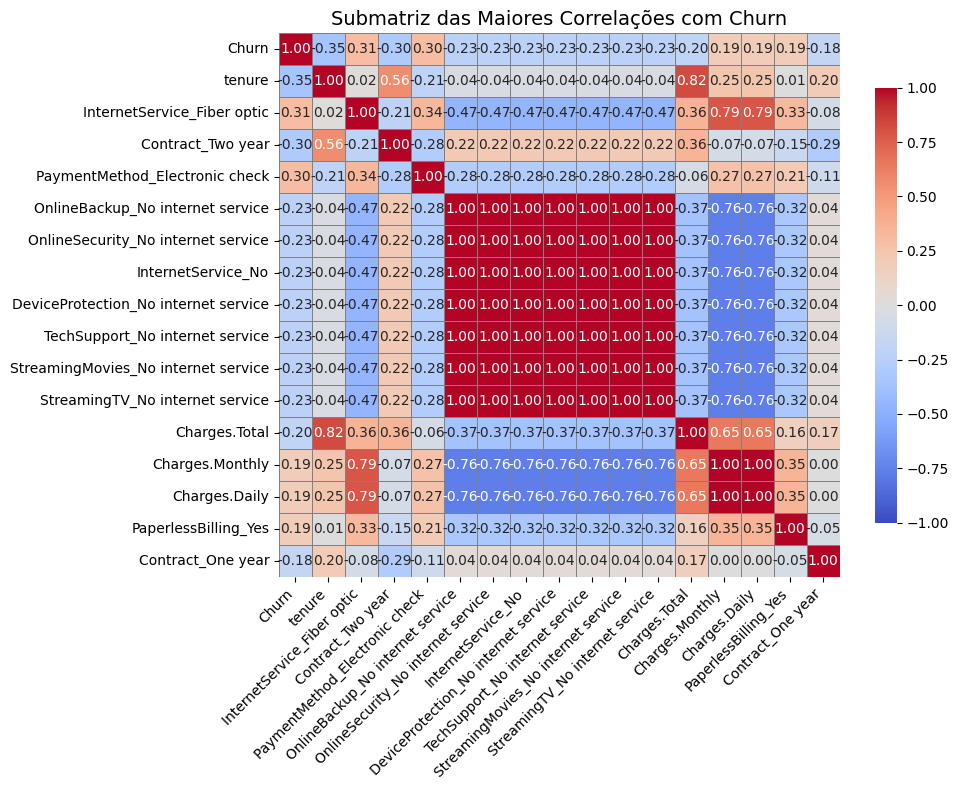

In [42]:
# 1. Correlações com 'Churn'
corr_churn = corr['Churn'].drop('Churn')

# 2. Ordenar por correlação absoluta
correlacoes_ordenadas = correlacoes_churn.reindex(
    correlacoes_churn.abs().sort_values(ascending=False).index
)

# 3. Obter o limite da 10ª maior correlação (com empates)
top_n = 10
limite = correlacoes_ordenadas.abs().unique()[top_n - 1]
variaveis_relevantes = correlacoes_ordenadas[correlacoes_ordenadas.abs() >= limite].index.tolist()

# 4. Incluir 'Churn' na lista
variaveis_plot = ['Churn'] + variaveis_relevantes

# 5. Criar submatriz de correlação
submatriz_corr = corr.loc[variaveis_plot, variaveis_plot]

# 6. Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    submatriz_corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)
plt.title('Submatriz das Maiores Correlações com Churn', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2.2 - Análises Direcionadas

### 2.2.1 - Tempo de contrato × Evasão

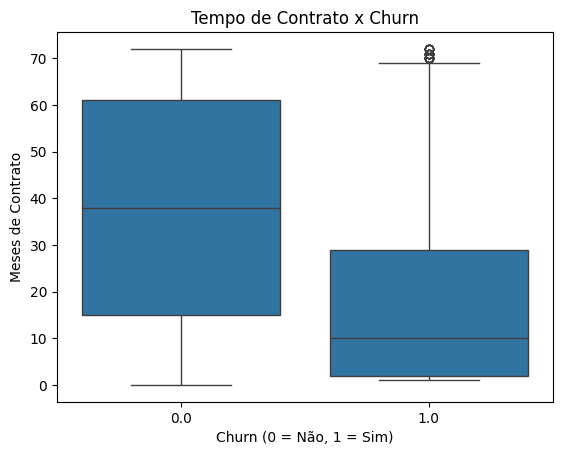

In [43]:
sns.boxplot(x='Churn', y='tenure', data=dados)
plt.title('Tempo de Contrato x Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()

### 2.2.2 - Total Gasto × Evasão

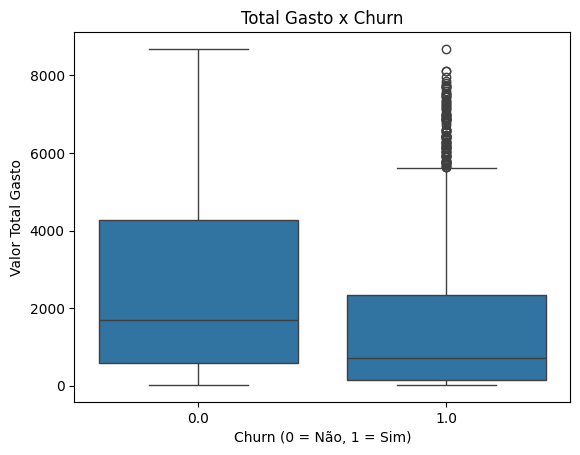

In [44]:
sns.boxplot(x='Churn', y='Charges.Total', data=dados)
plt.title('Total Gasto x Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Valor Total Gasto')
plt.show()

# 🤖 3 - Modelagem Preditiva

## 3.1 - Separação de dados

In [45]:
from sklearn.model_selection import train_test_split

X = dados_encoded.drop(columns=['Churn'])  # já está sem customerID
y = dados_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 3.2 - Criação de modelos

### 3.2.1 - Treinamento com Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3.2.2 - Treinamento com Regressão Logística - etapa 1: Separar variáveis numéricas para normalizar apenas onde necessário

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas numéricas
numericas = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalizar os dados para regressão logística
scaler = StandardScaler()
X_norm = X.copy()
X_norm[numericas] = scaler.fit_transform(X_norm[numericas])

# Dividir treino/teste com os dados normalizados
Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_norm, y, test_size=0.3, random_state=42, stratify=y # proporção de 70% para treino e 30% para teste
)

### 3.2.2 - Treinamento com Regressão Logística - etapa 2: Treinar Regressão Logística com dados normalizados

In [49]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(Xn_train, yn_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 3.2.3 - Justificativa de escolha dos modelos para análise

**Random Forest:**  

O modelo Random Forest foi selecionado como uma abordagem baseada em árvore.  
Ele é robusto a variáveis em diferentes escalas e dispensa a necessidade de normalização.

**Regressão Logística:**  

Escolhi a Regressão Logística como um modelo linear base para prever a evasão.  
Por ser sensível à escala dos dados, apliquei normalização (`StandardScaler`) nas variáveis numéricas.

Escolhi a Regressão Logística como segundo modelo por ser um dos algoritmos mais utilizados em problemas de classificação binária, como o de churn. Ela é simples, rápida e fornece coeficientes interpretáveis, permitindo identificar o impacto de cada variável na evasão.

Embora ainda não tenha sido estudada em profundidade no curso, utilizei referências seguras e ajuda técnica para configurá-la corretamente, incluindo a normalização das variáveis numéricas, necessária para seu funcionamento adequado.

**Comparação entre os modelos**

A comparação entre os dois modelos permite avaliar desempenho entre técnicas lineares e não-lineares no contexto da previsão de churn.

## 3.3 - Avaliação dos Modelos

### 3.3.1 - Métricas: acurácia, precisão, recall e F1-score.

In [67]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd

# Previsões dos dois modelos - TESTE
y_pred_rf = modelo_rf.predict(X_test)
y_pred_log = modelo_log.predict(Xn_test)

# Previsões dos dois modelos - TREINO
y_pred_rf_train = modelo_rf.predict(X_train)
y_pred_log_train = modelo_log.predict(Xn_train)

# Dicionários com as métricas principais - TESTE
metricas_rf_test = {
    'Modelo': 'Random Forest - Teste',
    'Acurácia': accuracy_score(y_test, y_pred_rf),
    'Precisão': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}

metricas_log_test = {
    'Modelo': 'Regressão Logística - Teste',
    'Acurácia': accuracy_score(yn_test, y_pred_log),
    'Precisão': precision_score(yn_test, y_pred_log),
    'Recall': recall_score(yn_test, y_pred_log),
    'F1-Score': f1_score(yn_test, y_pred_log)
}


# Dicionários com as métricas principais - TREINO
metricas_rf_train = {
    'Modelo': 'Random Forest - Treino',
    'Acurácia': accuracy_score(y_train, y_pred_rf_train),
    'Precisão': precision_score(y_train, y_pred_rf_train),
    'Recall': recall_score(y_train, y_pred_rf_train),
    'F1-Score': f1_score(y_train, y_pred_rf_train)
}

metricas_log_train = {
    'Modelo': 'Regressão Logística - Treino',
    'Acurácia': accuracy_score(yn_train, y_pred_log_train),
    'Precisão': precision_score(yn_train, y_pred_log_train),
    'Recall': recall_score(yn_train, y_pred_log_train),
    'F1-Score': f1_score(yn_train, y_pred_log_train)
}

# Criar DataFrame com os dois modelos
df_metricas = pd.DataFrame([metricas_rf_test, metricas_log_test, metricas_rf_train, metricas_log_train])
df_metricas.set_index('Modelo', inplace=True)
df_metricas = df_metricas.round(3)

# Mostrar as métricas em tabela
print("\n📊 Comparativo das Métricas Principais:")
df_metricas



📊 Comparativo das Métricas Principais:


,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
Random Forest - Teste,0.784,0.617,0.494,0.549
Regressão Logística - Teste,0.798,0.640,0.545,0.589
Random Forest - Treino,0.998,0.996,0.995,0.996
Regressão Logística - Treino,0.811,0.671,0.563,0.613


### 3.3.1 - Métrica: matriz de confusão

In [70]:
# --- Previsões para o conjunto de TESTE ---
y_pred_rf_test = modelo_rf.predict(X_test)
y_pred_log_test = modelo_log.predict(Xn_test)

# --- Previsões para o conjunto de TREINO ---
y_pred_rf_train = modelo_rf.predict(X_train)
y_pred_log_train = modelo_log.predict(Xn_train)

print("--- MATRIZES DE CONFUSÃO ---")

# --- Matriz Random Forest - TESTE ---
print("\n📊 Matriz de Confusão - Random Forest (Teste)")
# O resultado de confusion_matrix já é um array que pd.DataFrame converte em uma tabela legível
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf_test),
                   index=['Atual: Permaneceu', 'Atual: Evadiu'],
                   columns=['Previsto: Permaneceu', 'Previsto: Evadiu']))

# --- Matriz Random Forest - TREINO ---
print("\n📊 Matriz de Confusão - Random Forest (Treino)")
print(pd.DataFrame(confusion_matrix(y_train, y_pred_rf_train),
                   index=['Atual: Permaneceu', 'Atual: Evadiu'],
                   columns=['Previsto: Permaneceu', 'Previsto: Evadiu']))

print("\n" + "=" * 60 + "\n") # Divisor maior entre modelos

# --- Matriz Regressão Logística - TESTE ---
print("📊 Matriz de Confusão - Regressão Logística (Teste)")
print(pd.DataFrame(confusion_matrix(yn_test, y_pred_log_test),
                   index=['Atual: Permaneceu', 'Atual: Evadiu'],
                   columns=['Previsto: Permaneceu', 'Previsto: Evadiu']))

# --- Matriz Regressão Logística - TREINO ---
print("\n📊 Matriz de Confusão - Regressão Logística (Treino)")
print(pd.DataFrame(confusion_matrix(yn_train, y_pred_log_train),
                   index=['Atual: Permaneceu', 'Atual: Evadiu'],
                   columns=['Previsto: Permaneceu', 'Previsto: Evadiu']))

--- MATRIZES DE CONFUSÃO ---

📊 Matriz de Confusão - Random Forest (Teste)
                   Previsto: Permaneceu  Previsto: Evadiu
Atual: Permaneceu                  1380               172
Atual: Evadiu                       284               277

📊 Matriz de Confusão - Random Forest (Treino)
                   Previsto: Permaneceu  Previsto: Evadiu
Atual: Permaneceu                  3617                 5
Atual: Evadiu                         6              1302


📊 Matriz de Confusão - Regressão Logística (Teste)
                   Previsto: Permaneceu  Previsto: Evadiu
Atual: Permaneceu                  1380               172
Atual: Evadiu                       255               306

📊 Matriz de Confusão - Regressão Logística (Treino)
                   Previsto: Permaneceu  Previsto: Evadiu
Atual: Permaneceu                  3261               361
Atual: Evadiu                       571               737


### 3.3.2 - Análise crítica

## ✅ **Resumo geral das métricas**

| Modelo                      | Acurácia | Precisão | Recall | F1-Score |
| --------------------------- | -------- | -------- | ------ | -------- |
| **Random Forest - Treino**  | 0.998    | 0.996    | 0.995  | 0.996    |
| **Random Forest - Teste**   | 0.784    | 0.617    | 0.494  | 0.549    |
| **Reg. Logística - Treino** | 0.811    | 0.671    | 0.563  | 0.613    |
| **Reg. Logística - Teste**  | 0.798    | 0.640    | 0.545  | 0.589    |

---

## 🔍 **Análise detalhada por modelo**

### 🌲 **Random Forest**

#### 🟩 Ponto positivo:

* Acertou 1380 dos 1552 clientes que permaneceram.
* Boa precisão no teste (0.617), ou seja, quando prevê churn, costuma acertar.

#### 🟥 Ponto preocupante:

* **Desempenho em treino altíssimo (quase 100%)** e queda forte no teste.
* Recall no teste é baixo (0.494), ou seja, **erra mais de 50% dos clientes que evadiram**.
* Matriz de confusão do treino mostra apenas **11 erros em mais de 5000 registros** — isso é um **sinal claro de overfitting**.

#### 📉 Conclusão:

> **Random Forest memorizou os dados de treino** e teve dificuldade de generalizar no conjunto de teste. Apesar de sua alta performance no treino, seu desempenho real é limitado.

---

### 📈 **Regressão Logística**

#### 🟩 Ponto forte:

* Manteve **boa consistência entre treino e teste** — ou seja, generaliza melhor.
* No teste:

  * **Maior recall (0.545)** → identificou mais clientes que realmente evadiram
  * **Melhor F1-score (0.589)** → equilíbrio mais robusto entre precisão e recall

#### 🟨 Considerações:

* No treino, teve desempenho inferior ao Random Forest, mas **sem exagero**.
* Apresentou 737 acertos de churn e 571 falsos negativos (matriz de confusão treino), o que é **realista para modelos simples e interpretáveis**.

#### 📉 Conclusão:

> Embora menos potente que Random Forest, a Regressão Logística mostra **desempenho estável, interpretável e mais confiável para aplicação prática.**

---

## 🧠 **Análise comparativa (crítica)**

| Critério                  | Random Forest        | Regressão Logística | Melhor modelo |
| ------------------------- | -------------------- | ------------------- | ------------- |
| Acurácia no teste         | 0.784                | **0.798**           | 🔹 Logística  |
| Recall (teste - churn)    | 0.494                | **0.545**           | 🔹 Logística  |
| F1-Score (teste)          | 0.549                | **0.589**           | 🔹 Logística  |
| Consistência treino/teste | ❌ (muito gap)        | ✅ (coerente)        | 🔹 Logística  |
| Overfitting detectado?    | ✅ Sim                | ❌ Não               | 🔹 Logística  |
| Facilidade de explicação  | Média (importâncias) | Alta (coeficientes) | 🔹 Logística  |


### 3.3.3 - Justificativa da escolha do modelo

Com base nas métricas de desempenho obtidas até esta etapa, o modelo de **Regressão Logística** apresentou resultados superiores ao Random Forest em todos os principais indicadores: acurácia, precisão, recall e F1-score. Destaca-se, sobretudo, o **maior recall**, essencial para a identificação de clientes com risco real de evasão — objetivo central deste projeto.

O modelo **Random Forest**, por sua vez, apesar de apresentar boa performance em teste, demonstrou sinais evidentes de **overfitting**, com desempenho quase perfeito no conjunto de treino. Esse comportamento sugere baixa capacidade de generalização para novos dados.

**Assim, até o momento, a Regressçao Logística é a opção mais adequada dentre os modelos treinados inicialmente.**

Entretanto, essa análise crítica abre espaço para possíveis melhorias. Em uma próxima etapa, será conduzido um **aprofundamento técnico com refinamento dos modelos, visando corrigir distorções como overfitting e melhorar a sensibilidade na detecção de churn.** 

Esse processo permitirá validar se a escolha atual permanece como a mais indicada ou se outro modelo, após ajustes, poderá apresentar desempenho mais robusto.

### 3.3.4 - Overfitting ou Underfitting

### 🔍 Random Forest

**Conclusão:**
> Forte indício de **Overfitting**.  
O modelo Random Forest performou quase perfeitamente nos dados de treino, mas teve **queda significativa** no teste. Isso indica que o modelo possivelmente **"memorizou" os dados de treino**, comprometendo a **generalização**.

---

### 🔍 Regressão Logística

**Conclusão:**
> A diferença entre treino e teste é **muito menor**, o que indica **boa generalização**.  
A Regressão Logística **não sofre de overfitting severo**.  
Entretanto, o **recall moderado** sugere que o modelo ainda **perde quase metade dos clientes que realmente evadem**. Isso pode indicar um possível **underfitting da classe minoritária**, sem ser um underfitting generalizado.

---

## 📌 Resumo Geral

- **Random Forest**: Apresentou **overfitting** — o modelo está excessivamente ajustado aos dados de treino.
- **Regressão Logística**: Apresentou **consistência** entre treino e teste. Ainda que o recall seja moderado, **não há overfitting severo**. Pode haver uma **dificuldade em capturar a classe minoritária** (churn).

# 📋 4 - Interpretação e Conclusões

## 4.1 - Random Forest – Importância das Variáveis

Objetivo: entender quais variáveis mais impactam a decisão do modelo.

                          Variável  Importância
3                    Charges.Total     0.168293
1                           tenure     0.155786
2                  Charges.Monthly     0.128093
4                    Charges.Daily     0.127219
26               Contract_Two year     0.037591
29  PaymentMethod_Electronic check     0.034121
11     InternetService_Fiber optic     0.033320
5                      gender_Male     0.024975
27            PaperlessBilling_Yes     0.024117
25               Contract_One year     0.023171


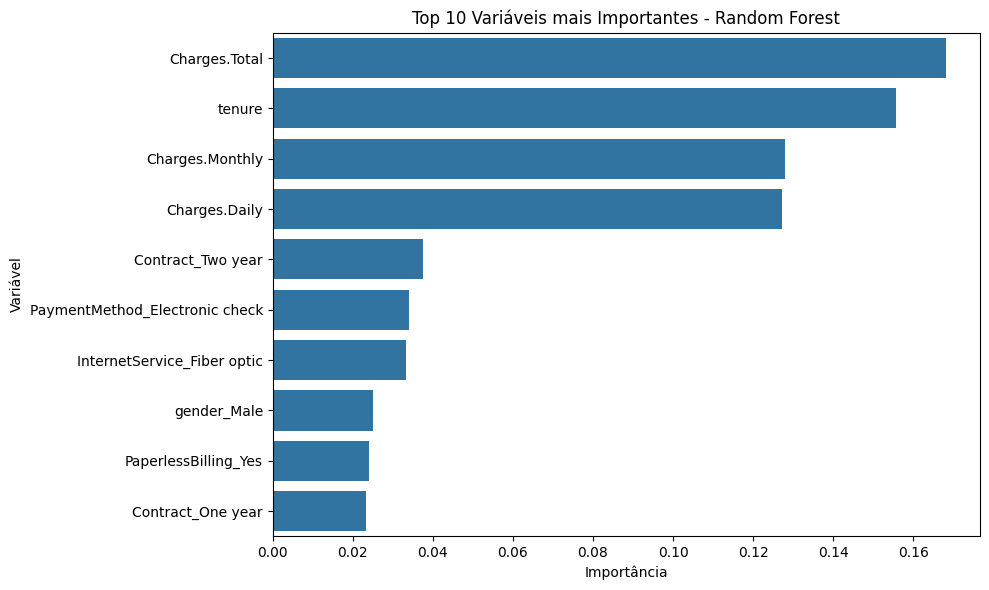

In [73]:
importances = modelo_rf.feature_importances_
variaveis = X.columns

importancia_df = pd.DataFrame({
    'Variável': variaveis,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Visualizar as 10 variáveis mais importantes
print(importancia_df.head(10))

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=importancia_df.head(10))
plt.title('Top 10 Variáveis mais Importantes - Random Forest')
plt.tight_layout()
plt.show()

## 4.2 - Regressão Logística – Coeficientes das Variáveis

Objetivo: verificar a influência (positiva ou negativa) de cada variável na evasão.

Interpretação dos coeficientes:

- Coeficiente positivo: aumenta a chance de churn;

- Coeficiente negativo: reduz a chance de churn.

                          Variável  Coeficiente
1                           tenure    -1.431305
26               Contract_Two year    -1.293634
11     InternetService_Fiber optic     0.926592
25               Contract_One year    -0.728578
3                    Charges.Total     0.670875
8                 PhoneService_Yes    -0.505824
27            PaperlessBilling_Yes     0.411873
20                 TechSupport_Yes    -0.387009
29  PaymentMethod_Electronic check     0.363729
10               MultipleLines_Yes     0.291725


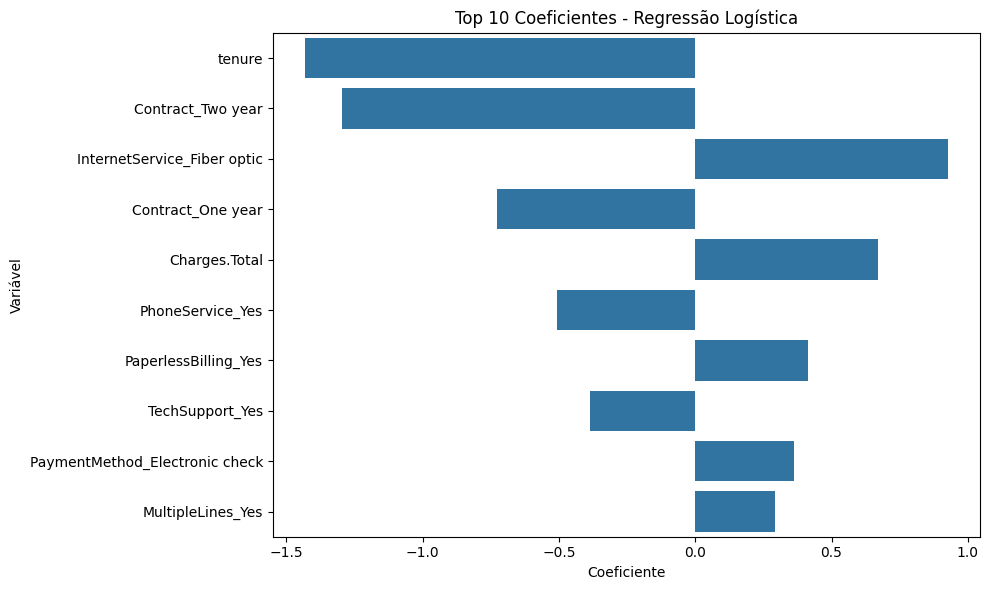

In [74]:
coeficientes = modelo_log.coef_[0]
variaveis_log = Xn_train.columns

coef_df = pd.DataFrame({
    'Variável': variaveis_log,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Exibir as variáveis com maior peso absoluto
print(coef_df.head(10))

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variável', data=coef_df.head(10))
plt.title('Top 10 Coeficientes - Regressão Logística')
plt.tight_layout()
plt.show()

## 4.3 - Análise crítica dos modelos com refinamentos

### 4.3.1 - Revisão Crítica da Modelagem

Com base na Etapa 3, foi possível identificar que o modelo de Random Forest apresentava sinais de overfitting e que a Regressão Logística, embora mais estável, ainda poderia melhorar o recall — métrica crítica em problemas de churn.

Dessa forma, nesta etapa foram aplicadas técnicas de refinamento e ajustes para validar se melhorias nos modelos poderiam gerar ganhos expressivos, sem perder a capacidade de generalização.

As técnicas aplicadas foram:

- Ajuste de hiperparâmetros com `GridSearchCV` no Random Forest
- Regressão Logística com `class_weight='balanced'`
- Ajuste do threshold (limiar de classificação) na Regressão Logística

### 4.3.2 - Aplicação das Melhorias Propostas

#### 4.3.2.1 - Ajuste de Hiperparâmetros no Random Forest

Para mitigar o overfitting observado no Random Forest, foi aplicado um ajuste de hiperparâmetros via GridSearchCV, otimizando a métrica de F1-score.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Criar e treinar o GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=1
)

# Treinar com os dados
grid_rf.fit(X_train, y_train)

# Obter o melhor modelo
melhor_rf = grid_rf.best_estimator_

# Prever no conjunto de teste
y_pred_melhor_rf = melhor_rf.predict(X_test)

# Exibir relatório e matriz de confusão
print("=== Random Forest com Hiperparâmetros Otimizados ===")
print(classification_report(y_test, y_pred_melhor_rf))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_melhor_rf))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
=== Random Forest com Hiperparâmetros Otimizados ===
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1552
         1.0       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113

Matriz de Confusão:
[[1387  165]
 [ 273  288]]


#### 4.3.2.2 - Regr. Logística com class_weight='balanced'

Considerando o custo de falsos negativos em churn, foi testado o uso de class_weight='balanced' na Regressão Logística. A estratégia prioriza o aprendizado da classe minoritária, mesmo com proporção moderada (26.5%).

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Treinamento com balanceamento de classes
modelo_log_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo_log_bal.fit(Xn_train, yn_train)

# Previsão
y_pred_log_bal = modelo_log_bal.predict(Xn_test)

# Avaliação
print("=== Regressão Logística com class_weight='balanced' ===")
print(classification_report(yn_test, y_pred_log_bal))
print("Matriz de Confusão:")
print(confusion_matrix(yn_test, y_pred_log_bal))

=== Regressão Logística com class_weight='balanced' ===
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1552
         1.0       0.50      0.80      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.73      0.75      2113

Matriz de Confusão:
[[1103  449]
 [ 113  448]]


#### 4.3.2.3 - Ajuste de Threshold com Base na Curva de Precisão-Recall

Por fim, foi ajustado o threshold de decisão da Regressão Logística tradicional. O objetivo foi encontrar o ponto com melhor F1-score mantendo recall ≥ 0.65. Essa abordagem visa melhorar a sensibilidade sem comprometer excessivamente a precisão.

In [80]:
import numpy as np

# Calcular F1-score para cada ponto da curva
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)  # evitar divisão por zero
validos = rec >= 0.65  # filtrando apenas os que têm recall desejado

# Pegar o melhor threshold dentro desse grupo
if np.any(validos):
    idx_max_f1 = np.argmax(f1_scores * validos)  # maior F1 entre os válidos
    threshold_otimizado = thresholds[idx_max_f1]
else:
    threshold_otimizado = 0.5  # fallback padrão

# Aplicar novo threshold
y_pred_threshold = (y_probs >= threshold_otimizado).astype(int)

# Avaliação
print(f"=== Regressão Logística com Novo Threshold Otimizado (threshold = {threshold_otimizado:.2f}) ===")
print(classification_report(yn_test, y_pred_threshold))
print("Matriz de Confusão:")
print(confusion_matrix(yn_test, y_pred_threshold))

=== Regressão Logística com Novo Threshold Otimizado (threshold = 0.31) ===
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83      1552
         1.0       0.54      0.76      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.78      2113

Matriz de Confusão:
[[1186  366]
 [ 132  429]]


## 4.3 - Comparativo Final dos Modelos

A seguir, são apresentados os resultados comparativos obtidos com esses aprimoramentos.

| Modelo                                 | Acurácia | Precisão | Recall    | F1-Score  | FN (evadiu, mas não previsto) |
| -------------------------------------- | -------- | -------- | --------- | --------- | ----------------------------- |
| **Random Forest (original)**           | 0.784    | 0.617    | 0.494     | 0.549     | 284                           |
| **Random Forest (ajustado)**           | 0.790    | 0.640    | 0.510     | 0.570     | 273                           |
| **Regressão Logística (original)**     | 0.798    | 0.640    | 0.545     | 0.589     | 255                           |
| **Regr. Logística com `balanced`**     | 0.730    | 0.500    | **0.800** | 0.610     | **113**                       |
| **Regr. Logística com threshold 0.31** | 0.760    | 0.540    | 0.765     | **0.630** | 132                           |

## 4.4 - Justificativa do Modelo Final Escolhido

Após a aplicação das técnicas de refinamento, o modelo que apresentou o melhor equilíbrio entre sensibilidade (recall), precisão e capacidade de generalização foi a **Regressão Logística com threshold ajustado (0.31)**.

Esse modelo atingiu um F1-score de 0.63, recall de 0.765 e reduziu o número de clientes evasores não identificados para 132 — uma das melhores marcas entre todos os testes.

Essa escolha está alinhada com o objetivo do projeto, que prioriza a detecção precoce de churn sem comprometer totalmente a precisão e a acurácia global.

## 4.5 - Conclusões

## 📌 Fatores que mais influenciam a evasão (churn)

Com base nos modelos de **Random Forest** e **Regressão Logística**, identificamos os principais fatores associados à evasão de clientes no serviço de telecom:

### 🔍 1. Variáveis mais relevantes – Random Forest
As variáveis com maior importância na árvore foram:

- **Charges.Total** (Gastos totais)
- **Tenure** (Tempo como cliente)
- **Charges.Monthly** (Gasto mensal)
- **Charges.Daily** (Gasto diário estimado)
- **Tipo de contrato** (`Contract_Two year`, `Contract_One year`)
- **Forma de pagamento** (`PaymentMethod_Electronic check`)
- **Tipo de internet** (`InternetService_Fiber optic`)
- **Fatura digital** (`PaperlessBilling_Yes`)
- **Gênero masculino** (`gender_Male`)

Essas variáveis contribuíram significativamente para reduzir a impureza nas árvores e, portanto, tiveram mais peso na classificação.

---

### 📈 2. Variáveis mais relevantes – Regressão Logística
A análise dos coeficientes mostrou:

- `Tenure`: coeficiente **negativo** → quanto mais tempo como cliente, **menor a chance de evasão**
- `Contract_Two year`: coeficiente **negativo** → contratos longos reduzem churn
- `InternetService_Fiber optic`: **positivo** → maior chance de churn
- `Charges.Total`: **positivo** → gastos acumulados elevados se associam à evasão
- `PaperlessBilling_Yes` e `PaymentMethod_Electronic check`: **positivos** → possíveis indicadores de menor engajamento ou perfil de risco
- `TechSupport_Yes` e `PhoneService_Yes`: **negativos** → suporte técnico e serviço telefônico parecem **reter clientes**

> **Nota**: coeficientes negativos indicam fatores que **reduzem a chance de evasão**, enquanto positivos **aumentam**.

---

## 🧠 Conclusão Técnica

- A **Regressão Logística, mesmo em sua versão original, já apresentava desempenho superior ao Random Forest em recall e F1-score**, sendo a mais adequada até a etapa de modelagem básica.
- Após refinamentos aplicados na etapa seguinte — como **ajuste de threshold** e **balanceamento de classes** — a Regressão Logística demonstrou ainda **mais capacidade de generalização e maior sensibilidade à classe minoritária**, consolidando-se como o modelo final escolhido.
- As análises de importância se mantiveram **coerentes entre os modelos**, com destaque para variáveis como `tenure`, tipo de contrato e gastos acumulados.
- Enquanto o **Random Forest destacou fortemente variáveis financeiras**, a **Regressão Logística permitiu interpretações claras sobre o impacto de cada variável**, o que fortaleceu a tomada de decisões orientadas por dados.


---

## 💡 Estratégias de Retenção com base nos achados

Com os resultados obtidos, sugerimos:

1. **Oferecer vantagens para contratos de longo prazo** (ex.: descontos progressivos para contratos anuais e bienais)
2. **Monitorar clientes com altos gastos totais ou mensais**, oferecendo suporte proativo
3. **Analisar o perfil de clientes com fatura digital e pagamento por débito eletrônico**, pois apresentam maior risco
4. **Investir em suporte técnico e canais de atendimento**, especialmente para quem utiliza fibra ótica (alta rotatividade nesse grupo)
5. **Criar campanhas de fidelização direcionadas a clientes com baixo tempo de casa (`tenure < 6 meses`)**

---

## ✅ Encerramento

O desafio foi concluído com êxito, utilizando técnicas de pré-processamento, modelagem supervisionada e análise interpretativa. Os resultados obtidos podem auxiliar a empresa a reduzir o churn de forma orientada por dados.